# Perceptron


## Give me some data
Let's create some linearly separable points

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data_around_straight_line(slope, intercept, num_data_points, x_min, x_max, separation_margin=0.01):
    """ Generates x,y pairs around the (slope * x + intercept) line
        Labels points below the line as a zero label
        Labels points above the line as a one label

    Parameters
    ----------
    slope : int
        slope of the line (the m from m*x +b)
    intercept : int
        y-intercept of the line (the b from m*x +b)
    num_data_points : int
        PER LABEL number of data points to generate:
        it will generate num_data_points with label 0 PLUS
        num_data_points with label 1
    x_min : int
        The min value of the X range
    x_max : int
        The max value of the X range
    separation_margin: float
        how far off x_min and x_max should the data points be generated

    Returns
    -------
    all_records
        2-D shuffled numpy array, ready for training
        1st column: x coordinate, 2nd: column y coordinate, 3rd: label
    """

    # range feature1 values between x_min and x_max
    feature_1_negative_label = np.round(np.random.uniform(low=x_min + separation_margin, high=x_max - separation_margin, size=num_data_points),
                                            decimals=2)
    feature_1_positive_label = np.round(np.random.uniform(low=x_min + separation_margin, high=x_max - separation_margin, size=num_data_points),
                                          decimals=2)

    feature2_low = slope * (x_min if slope > 0 else x_max) + intercept
    feature2_high = slope * (x_max if slope > 0 else x_min) + intercept

    feature_2_negative_label_line_points = slope * feature_1_negative_label + intercept
    feature_2_positive_label_line_points = slope * feature_1_positive_label + intercept

    feature_2_negative_label = []
    feature_2_positive_label = []
    for index in range(num_data_points):
        feature_2_negative_label.append(
            np.round(
                np.random.uniform(low=feature2_low + separation_margin, high=feature_2_negative_label_line_points[index] - separation_margin),
                decimals=2
            )
        )
        feature_2_positive_label.append(
            np.round(
                np.random.uniform(low=feature_2_positive_label_line_points[index] + separation_margin, high=feature2_high - separation_margin),
                decimals=2
            )
        )

    feature_2_negative_label = np.asarray(feature_2_negative_label)
    feature_2_positive_label = np.asarray(feature_2_positive_label)

    # since the perceptron will learn a line of the form a*x + b*y + c = 0
    # x will be our x-coordinate(feature1), y will be our y coordinate(feature2)
    # a, b and c will make up our weights vector - w1, w2 and w3
    bias_filler_feature = np.ones(num_data_points)

    negative_labels = -1 * np.ones(num_data_points)
    positive_labels = np.ones(num_data_points)

    # build the ML matrix
    # x-coordinate | y-coordinate | ones_for_the_bias | label
    # -------------------------------------------------------
    zero_records = np.vstack((feature_1_negative_label, feature_2_negative_label, bias_filler_feature,
                              negative_labels)).T
    one_records = np.vstack((feature_1_positive_label, feature_2_positive_label, bias_filler_feature,
                             positive_labels)).T

    all_records = np.vstack((zero_records, one_records))
    np.random.shuffle(all_records)

    return all_records

# generate_data_around_straight_line(slope=1, intercept=1, num_data_points=50, x_min=0, x_max=5, separation_margin=0.5)

## Show me te data
Let's plot the training records:


In [44]:
def plot_records(records, slope, intercept, x_min, x_max):

    negative_records = records[records[:, 3] == -1]
    positive_records = records[records[:, 3] == 1]

    feature_1_negative_label = negative_records[:, 0]
    feature_2_negative_label = negative_records[:, 1]

    feature_1_positive_label = positive_records[:, 0]
    feature_2_positive_label = positive_records[:, 1]

    feature2_low = slope * (x_min if slope > 0 else x_max) + intercept
    feature2_high = slope * (x_max if slope > 0 else x_min) + intercept

    plt.scatter(feature_1_negative_label, feature_2_negative_label, c='red')
    plt.scatter(feature_1_positive_label, feature_2_positive_label, c='green')
    plt.axline((x_min, feature2_low if slope > 0 else feature2_high),
               (x_max, feature2_high if slope > 0 else feature2_low), c='blue')
    plt.show()

First Moment of truth: Let's generate training data and plot it
Positive slope line:


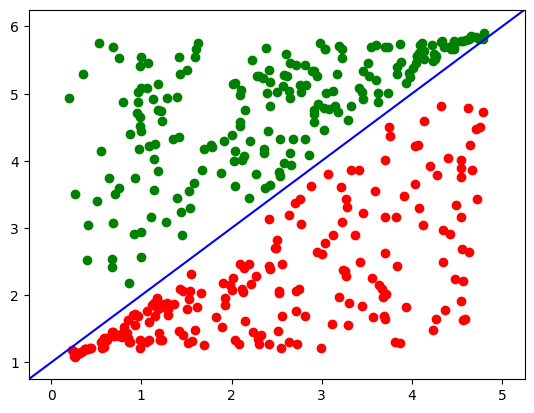

In [45]:
slope = 1
intercept = 1
num_data_points = 200
x_min = 0
x_max = 5
separation_margin = 0.2

training_records = generate_data_around_straight_line(slope=slope, intercept=intercept, num_data_points=num_data_points,
                                                      x_min=x_min, x_max=x_max, separation_margin=0.2)

plot_records(records=training_records, slope=slope, intercept=intercept, x_min=x_min, x_max=x_max)


And a negative slope?


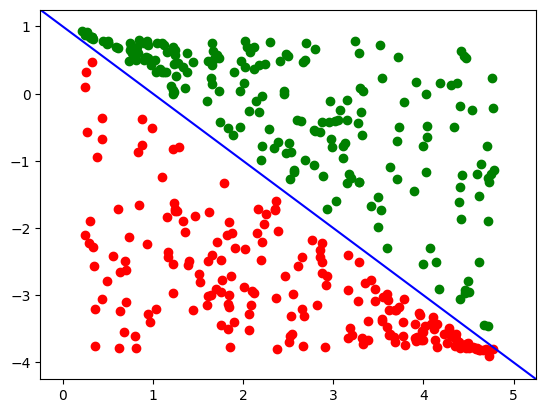

In [46]:
slope = -1

training_records = generate_data_around_straight_line(slope=slope, intercept=intercept, num_data_points=num_data_points,
                                                      x_min=x_min, x_max=x_max, separation_margin=0.2)

plot_records(records=training_records, slope=slope, intercept=intercept, x_min=x_min, x_max=x_max)
